# Seasonal Effects on Larceny Rates in Asheville

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [12]:
# s is our raw series of observations
s = pd.read_pickle('lar_series.pkl')

In [13]:
s.describe()

count           27657
unique             21
top       LARCENYFMMV
freq            11460
Name: offense_short_description, dtype: object

In [25]:
s.head()

incident_dt
2008-12-15 11:00:00          LARCFEL
2009-09-18 00:00:00    LARCENYFMBLDG
2009-10-01 00:00:00    LARCENYFMBLDG
2007-01-12 04:30:00      LARCENYFMMV
2012-07-26 00:00:00    LARCENYFMBLDG
Name: offense_short_description, dtype: object

In [26]:
X = s.resample('M').count()

In [27]:
X.sort_index(inplace=True)

In [28]:
X.head()

incident_dt
2005-01-31    173
2005-02-28    157
2005-03-31    157
2005-04-30    182
2005-05-31    189
Freq: M, Name: offense_short_description, dtype: int64

In [33]:
print("dates run from {} to {}".format(X.index[0].date(), X.index[-1].date()))

dates run from 2005-01-31 to 2018-05-31


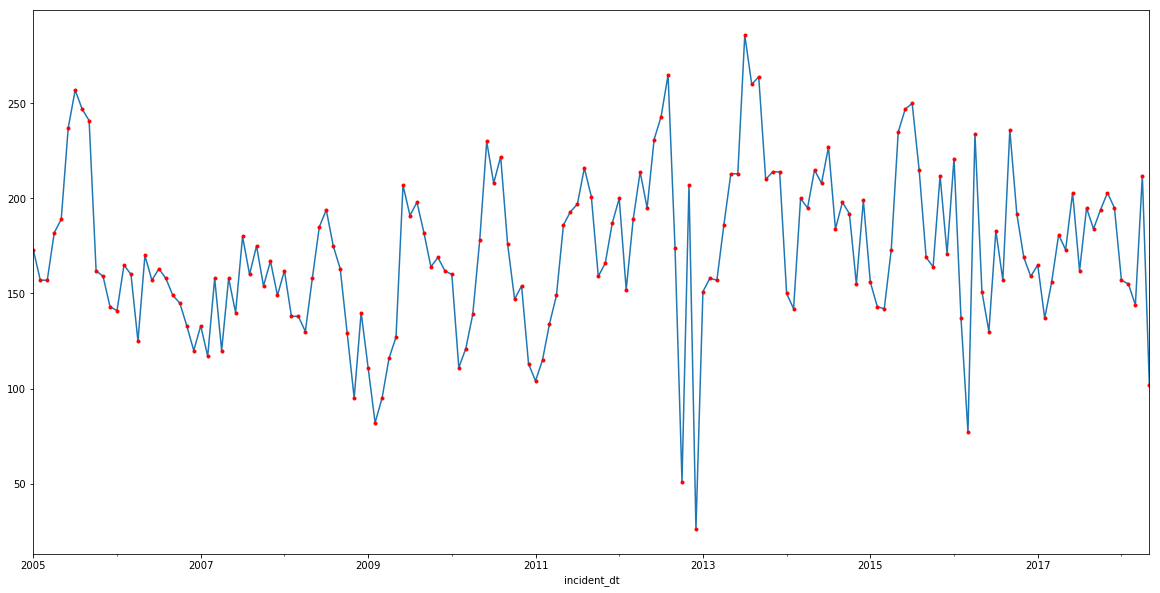

In [39]:
X.plot()
X.plot(style='r.')

_remove outliers_

In [42]:
m = X.mean()
sd = X.std()

In [47]:
X2 = pd.Series(X).where(lambda x : x > m - 2 * sd).dropna()

In [48]:
X2 = pd.Series(X2).where(lambda x : x < m + 2 * sd).dropna()

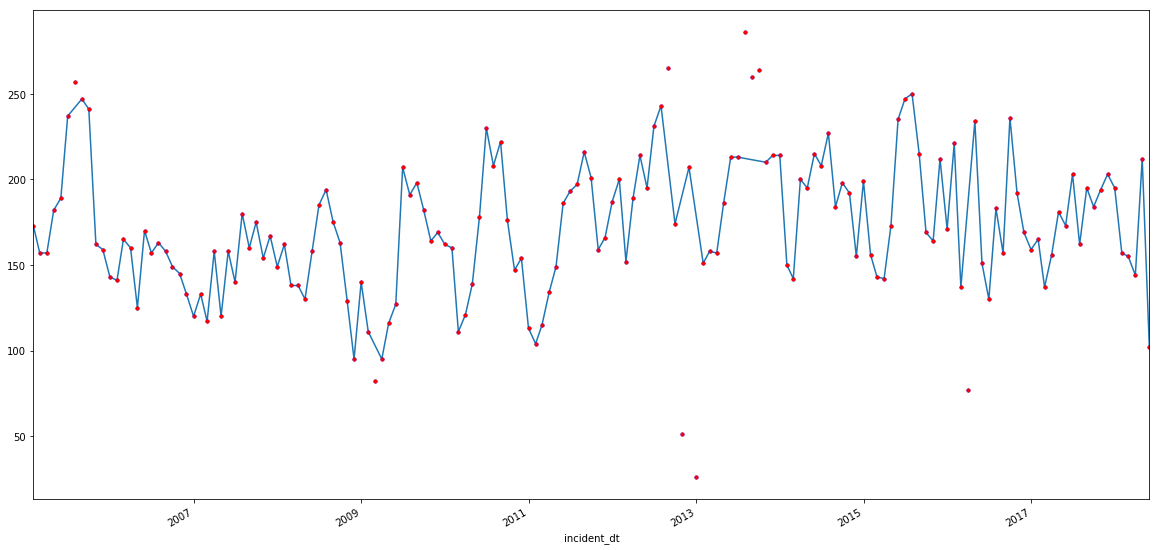

In [52]:
X2.plot()
X.plot(style='b.')
X.plot(style='r.')